# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [62]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [63]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('train_house.csv', delimiter=',')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [65]:
house[house.columns[house.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [66]:
# Drop variabel NaN
house.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [67]:
# Memisahkan data menjadi numerikal & kategorikal
numerical_columns = house.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = house.select_dtypes(include=['object']).columns.tolist()

numerical_house = house[numerical_columns]
categorical_house = house[categorical_columns]

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

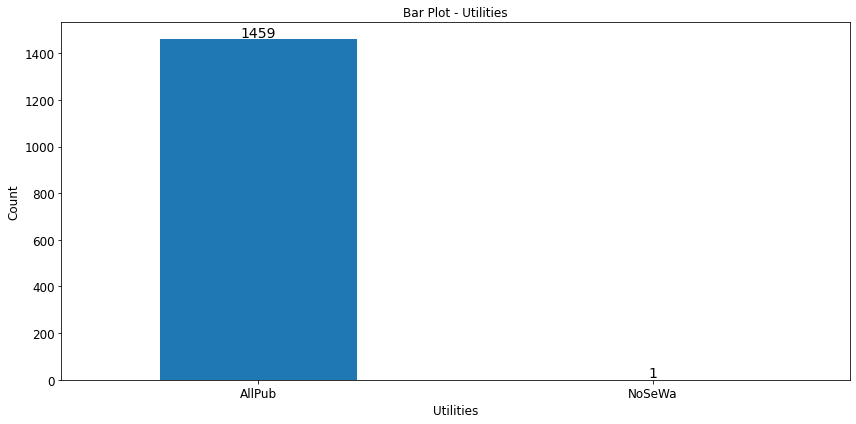

In [68]:
### Tulis kode Anda di sini

plt.figure(figsize=(12, 6))
categorical_house['Utilities'].value_counts().plot(kind='bar')

value_counts = categorical_house['Utilities'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=14)

plt.title(f'Bar Plot - Utilities', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Utilities', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

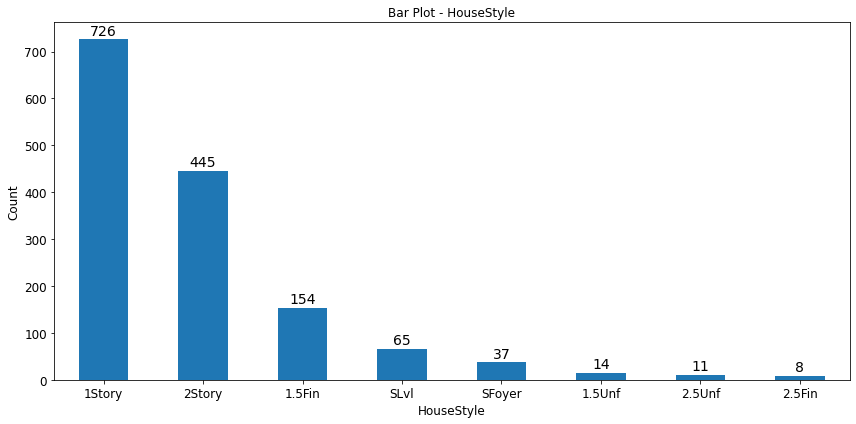

In [69]:
### Tulis kode Anda di sini

plt.figure(figsize=(12, 6))
categorical_house['HouseStyle'].value_counts().plot(kind='bar')

value_counts = categorical_house['HouseStyle'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=14)

plt.title(f'Bar Plot - HouseStyle', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('HouseStyle', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

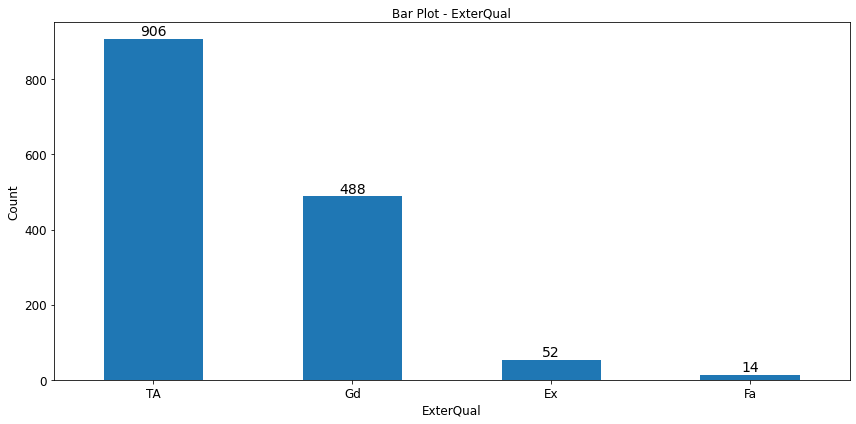

In [70]:
### Tulis kode Anda di sini

plt.figure(figsize=(12, 6))
categorical_house['ExterQual'].value_counts().plot(kind='bar')

value_counts = categorical_house['ExterQual'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=14)

plt.title(f'Bar Plot - ExterQual', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('ExterQual', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

#### **Analisis tentang variabel kategorikal**

##### <b>Utilities</b> : Fasilitas yang paling banyak dibeli merupakan AllPub dengan angka 1459 dan hanya ada satu pembeli yang menggunakan fasilitas NoSeWa. Dimana secara keseluruhan, pembeli lebih berminat menggunakan fasilitas AllPub. 

##### <b>HouseStyle</b> : Dua style properti paling diminati adalah 1Story sebanyak 726 pembelian (49.72%) dan 2Story sebanyak 445 pembelian (30.47%). Sedangkan style sisanya jumlah pembeliannya sangat 'jomplang' jika dibandingkan dengan 1Story dan 2Story, yaitu dengan total jumlah 289 (19.81%). Dimana tiga style properti terendah adalah 1.5Unf, 2.5Unf, dan 2.5Fin. 

##### <b>ExterQual</b> : Kualitas material eksterior terbanyak yaitu dengan kualitas TA (Average) pada angka 906 dan Gd (Good) dengan angka 488. Sedangkan untuk kualitas yang Ex (Excellent) sebanyak 52 dan kualitas Fa (Fair) sebanyak 14. Jadi dapat dilihat bahwa kualitas eksterior kebanyakan dengan kualitas TA atau Average.

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

In [71]:
### Tulis kode Anda di sini

print(f"Median : {np.median(numerical_house['SalePrice'])}")
print(f"Mean : {round(np.mean(numerical_house['SalePrice']), 2)}")
print(f"Std. Dev : {round(np.std(numerical_house['SalePrice']), 2)}")

Median : 163000.0
Mean : 180921.2
Std. Dev : 79415.29


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

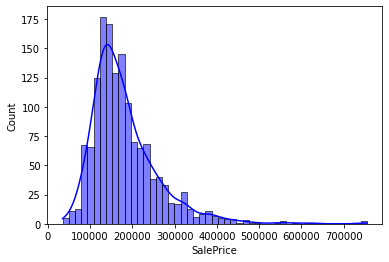

In [72]:
sns.histplot(numerical_house['SalePrice'], kde=True, color='blue') 

#### **Analisis tentang variabel `SalePrice`**

* Secara rata-rata, sales price properti berada pada angka 180 ribu. 
* Dapat dilihat juga bahwa standar deviasi dari variabel ini sangat besar yaitu 79415, hal ini mengartikan bahwa sale price properti yang ada harganya sangat bervariasi. Karena semakin tinggi standar deviasinya, maka semakin beragam juga value yang ada.
* Dari plot persebaran datanya, dapat dilihat bahwa persebaran datanya skew right. Dimana saleprice properti terbanyak berada pada kisaran 100.000 s/d 300.000.

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

In [73]:
### Tulis kode Anda di sini
print(f"Median : {np.median(numerical_house['GrLivArea'])}")
print(f"Mean : {round(np.mean(numerical_house['GrLivArea']), 2)}")
print(f"Std. Dev : {round(np.std(numerical_house['GrLivArea']), 2)}")

Median : 1464.0
Mean : 1515.46
Std. Dev : 525.3


<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

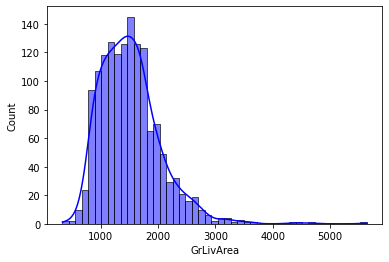

In [74]:
sns.histplot(numerical_house['GrLivArea'], kde=True, color='blue') 

#### **Analisis tentang variabel `GrlivArea`**

* Secara rata-rata, luas area tinggal berada pada angka 1515 square feet
* Lalu dari nilai standar deviasi, nilainya tidak terlalu besar yaitu 525. Hal ini mengartikan bahwa valuenya tidak terlalu beragam.
* Dari plot persebaran datanya, dapat dilihat bahwa persebaran datanya skew right. Dimana luas area tinggal terbanyak berada pada kisaran 1000 s/d 2000.

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

In [75]:
### Tulis kode Anda di sini
print(f"Median : {np.median(numerical_house['GarageArea'])}")
print(f"Mean : {round(np.mean(numerical_house['GarageArea']), 2)}")
print(f"Std. Dev : {round(np.std(numerical_house['GarageArea']), 2)}")

Median : 480.0
Mean : 472.98
Std. Dev : 213.73


<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

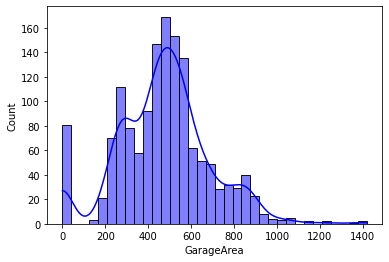

In [76]:
sns.histplot(numerical_house['GarageArea'], kde=True, color='blue') 

#### **Analisis tentang variabel `GarageArea`**

* Secara rata-rata, luas area garasi berada pada angka 473 square feet
* Lalu dari nilai standar deviasi, nilainya tidak terlalu besar yaitu 213. Hal ini mengartikan bahwa valuenya tidak terlalu beragam.
* Dari plot persebaran datanya, dapat dilihat bahwa persebaran datanya dapat dikatakan skew right dan agak tidak beraturan. Dimana luas garasi terbanyak berada pada kisaran 200 s/d 1000.
* <b>Lalu ada hal yang menarik</b>, yaitu terdapat value pada variable ini yang bernilai nol (0). Oleh karena itu, nanti yang bernilai value 0 akan didrop.

## Pemrosesan Data Variabel Numerikal

In [78]:
# Transformasi log-10 SalePrice
numerical_house['SalePrice'] = np.log10(numerical_house['SalePrice'])

### Tulis kode Anda di sini
print(f"Median : {np.median(numerical_house['SalePrice'])}")
print(f"Mean : {np.mean(numerical_house['SalePrice'])}")
print(f"Std. Dev : {np.std(numerical_house['SalePrice'])}")

Median : 5.212187604403958
Mean : 5.221978956475628
Std. Dev : 0.17342032112458186


C:\Users\marse\AppData\Local\Temp\ipykernel_12880\1813143681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_house['SalePrice'] = np.log10(numerical_house['SalePrice'])


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

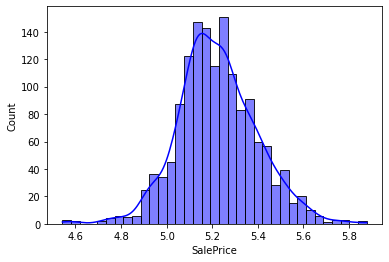

In [79]:
sns.histplot(numerical_house['SalePrice'], kde=True, color='blue') 

In [80]:
# Transformasi log-10 GrLivArea
numerical_house['GrLivArea'] = np.log10(numerical_house['GrLivArea'])

### Tulis kode Anda di sini
print(f"Median : {np.median(numerical_house['GrLivArea'])}")
print(f"Mean : {np.mean(numerical_house['GrLivArea'])}")
print(f"Std. Dev : {np.std(numerical_house['GrLivArea'])}")

Median : 3.165541076722373
Mean : 3.156354310389778
Std. Dev : 0.14480949091518763


C:\Users\marse\AppData\Local\Temp\ipykernel_12880\3580682963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_house['GrLivArea'] = np.log10(numerical_house['GrLivArea'])


<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

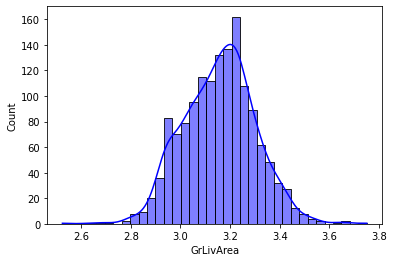

In [81]:
sns.histplot(numerical_house['GrLivArea'], kde=True, color='blue') 

In [87]:
# Menghilangkan nilai nol pada GarageArea
numerical_house = numerical_house[numerical_house['GarageArea'] != 0] 
numerical_house['GarageArea'] = np.log10(numerical_house['GarageArea'])

### Tulis kode Anda di sini
print(f"Median : {np.median(numerical_house['GarageArea'])}")
print(f"Mean : {np.mean(numerical_house['GarageArea'])}")
print(f"Std. Dev : {np.std(numerical_house['GarageArea'])}")

Median : 2.6848453616444123
Mean : 2.6696154158200915
Std. Dev : 0.1642188306108688


<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

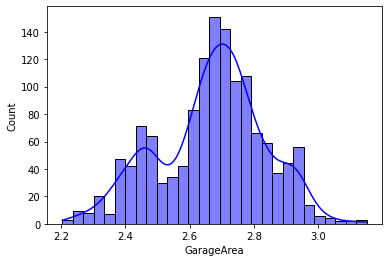

In [88]:
sns.histplot(numerical_house['GarageArea'], kde=True, color='blue') 

#### **Penjelasan dan analisis tentang pemrosesan data**

* Setelah dilakukan transformasi data dengan log10 pada ketiga variabel. Dapat dilihat bahwa nilai median, mean, dan standar deviasinya menjadi lebih kecil dibandingkan sebelumnya yang belum dilakukan transformasi. Selain itu juga, sesuai dengan plot distribusi datanya. Persebaran datanya menjadi berdistribusi normal, dimana sebelumnya kedua variabel ini berdistribusi skew right.
* Pada variable 'GarageArea' dilakuakn drop value yang bernilai nol (0). Karena pada sebelumnya terdapat insight bahwa value pada variable ini ada yang bernilai nol. Dimana mustahil jikalau nilainya bernilai 0 untuk sebuah luas area.

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

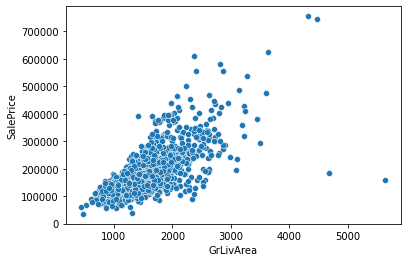

In [26]:
ax = sns.scatterplot(data=numerical_house, x='GrLivArea', y='SalePrice')

# `GarageArea` dengan `SalePrice`

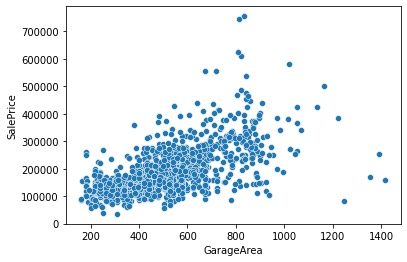

In [27]:
ax = sns.scatterplot(data=numerical_house, x='GarageArea', y='SalePrice')

#### **Hipotesis tentang hubungan antar-variabel**

* <b>Hubungan GrLiveArea dengan SalePrice</b> : Dari plot tersebut, plotnya agak mengarah ke kanan atas. Dimana artinya bahwa semakin tinggi luas GrLivArea-nya maka SalePrice-nya akan semakin naik juga.
* <b>Hubungan GarageArea dengan SalePrice</b> : Dari plot tersebut, secara keseluruhan plotnya dapat dikatakan agak ke kanan walaupun tidak terlalu mengarah ke kanan atas sekali, karena terdapat beberapa data-data point yang jaraknya jauh dan agak mengganggu untuk interpretasi datanya. Jadi hipotesis saya untuk kedua variable ini adalah semakin tinggi luas GarageArea-nya maka semakin tinggi juga SalePrice-nya.
* <b>Kesimpulan</b> : Dari kedua hubungan GrLiveArea-SalePrice dan GarageArea-SalePrice. Dapat diambil hipotesis bahwa semakin tinggi GrLiveArea dan GarageArea, maka semakin tinggi juga SalePrice-nya.